In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
train_data = pd.read_csv('adult.data', header= None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
test_data = pd.read_csv('adult.test', header= None, skiprows=1,  names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])




od = test_data

#編號與特徵無關
train_data = train_data.drop(['fnlwgt'], axis=1)
test_data = test_data.drop(['fnlwgt'], axis=1)

#education與education-num相對應(重複)，故刪除。
train_data.drop(['education'], axis = 1, inplace = True)
test_data.drop(['education'], axis = 1, inplace = True)

# 每個元素的前後空格去掉
train_data = train_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
test_data = test_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#查看各欄"?"各數
# train_data.apply(lambda x: np.sum(x == "?"))
# test_data.apply(lambda x: np.sum(x == "?"))

#把"?"取代為NaT
train_data.replace("?", pd.NaT, inplace = True)
test_data.replace("?", pd.NaT, inplace = True)


# #將缺失值補齊，名目資料填眾數，數值資料填平均值。
fill_data = {'workclass': train_data['workclass'].mode()[0], 'occupation': train_data['occupation'].mode()[0], 'native-country': train_data['native-country'].mode()[0]}
fill_data_test = {'workclass': test_data['workclass'].mode()[0], 'occupation': test_data['occupation'].mode()[0], 'native-country': test_data['native-country'].mode()[0]}

#缺失值填充
train_data.fillna(fill_data, inplace=True)
test_data.fillna(fill_data_test, inplace=True)

#將income欄位>50K改為1，<=50K改為0
train_data['income'] = train_data['income'].apply(lambda x: 0 if x == "<=50K" else 1)
test_data['income'] = test_data['income'].apply(lambda x: 0 if x == '<=50K.' else 1)


train_data.describe()
# train_data.info()
# train_data

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [7]:
# 提取出數值特徵欄位
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

scaler = StandardScaler()

#提取個別特徵欄位之數值，並計算該欄位之max與min，並把該欄位依照該max、min值重新scale至[0,1]
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data[numerical_columns]), columns=numerical_columns)
train_data[numerical_columns] = train_data_scaled

#提取個別特徵欄位之數值，並計算該欄位之max與min，並把該欄位依照該max、min值重新scale至[0,1]
test_data_scaled = pd.DataFrame(scaler.transform(test_data[numerical_columns]), columns=numerical_columns)
test_data[numerical_columns] = test_data_scaled

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   education-num   32561 non-null  float64
 3   marital-status  32561 non-null  object 
 4   occupation      32561 non-null  object 
 5   relationship    32561 non-null  object 
 6   race            32561 non-null  object 
 7   sex             32561 non-null  object 
 8   capital-gain    32561 non-null  float64
 9   capital-loss    32561 non-null  float64
 10  hours-per-week  32561 non-null  float64
 11  native-country  32561 non-null  object 
 12  income          32561 non-null  int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 3.2+ MB


In [8]:
# 使用pandas的get_dummies函數執行獨熱編碼
train_data = pd.get_dummies(train_data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], dtype=int)


test_data = pd.get_dummies(test_data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], dtype=int)

#在讀熱編碼後會依照有名目之欄位產生資料，train_data比test_data多出了該欄位，故將test_data新增該欄位，讓兩個資料集欄位相同。
test_data['native-country_Holand-Netherlands'] = 0

#刪除重複列
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

#將資料隨機化
from sklearn.utils import shuffle
train_data = shuffle(train_data)

#train_data.describe()


In [9]:
# test_data.info()


In [10]:

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import metrics

#提取train_data所有特徵，除了income，為了將特徵獨立出來訓練
X = train_data.drop('income', axis=1).sort_index(axis=1)


#提取train_data的income為預測的目標
y = train_data['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建神经网络模型
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=X_train.shape[1])) # 當建立神經網絡時，需要指定輸入層的維度，以便確保輸入數據與模型相容。在 Keras 或 TensorFlow 中，通常是通過 input_dim 參數來指定輸入層的維度。
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 编译模型
# 當處理二元分類（Binary Classification）問題時，使用二元交叉熵損失（Binary Cross Entropy Loss）
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.F1Score()])

# 训练模型
history = model.fit(X_train, y_train, epochs=30, batch_size=256, validation_split=0.2)


Epoch 1/30


c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8129 - f1_score: 0.4063 - loss: 0.3954 - precision: 0.6777 - recall: 0.4941 - val_accuracy: 0.8477 - val_f1_score: 0.3897 - val_loss: 0.3130 - val_precision: 0.7162 - val_recall: 0.6141
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8515 - f1_score: 0.4020 - loss: 0.3152 - precision: 0.7342 - recall: 0.6423 - val_accuracy: 0.8501 - val_f1_score: 0.3897 - val_loss: 0.3095 - val_precision: 0.7497 - val_recall: 0.5713
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8538 - f1_score: 0.3980 - loss: 0.3136 - precision: 0.7442 - recall: 0.6280 - val_accuracy: 0.8462 - val_f1_score: 0.3897 - val_loss: 0.3073 - val_precision: 0.6991 - val_recall: 0.6399
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8613 - f1_score: 0.3952 - loss: 0.3007 - precision: 0.7570 - recall: 0.6433 - val_accuracy: 0.8460 - val_f1_score: 0.3897 - val_loss: 0.3130 - val_precision: 0.6848 - val_recall: 0.6738
Epoch 5/3

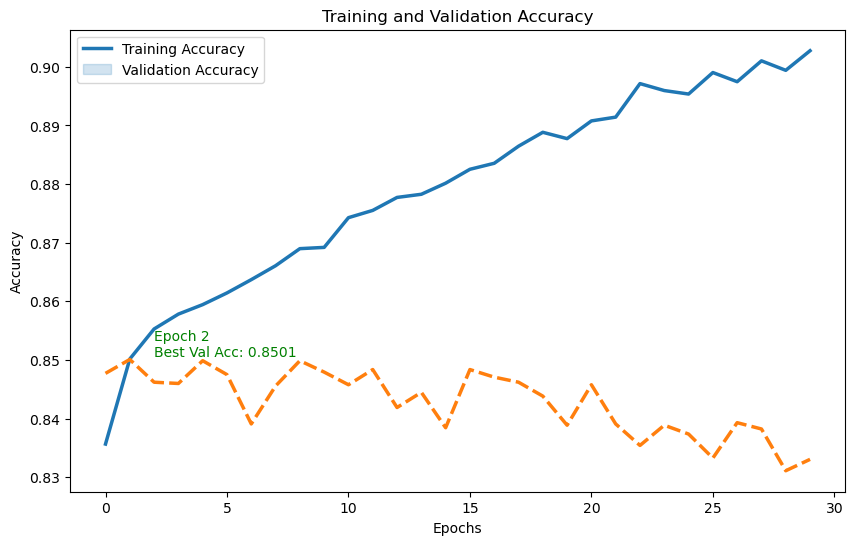

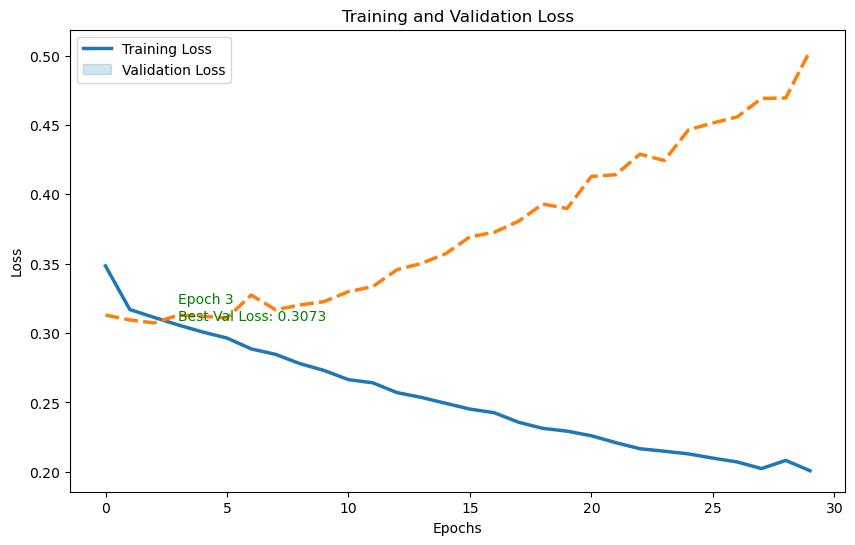

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(10, 6))
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], palette="tab10", linewidth=2.5)
best_val_accuracy = history_df['val_accuracy'].max()
best_val_epoch = history_df['val_accuracy'].idxmax() + 1
plt.text(best_val_epoch, best_val_accuracy, f'Epoch {best_val_epoch}\nBest Val Acc: {best_val_accuracy:.4f}', 
             horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(labels=['Training Accuracy', 'Validation Accuracy'])
plt.show()

history_df = pd.DataFrame(history.history)
# 使用 Seaborn 繪製曲線
plt.figure(figsize=(10, 6))
sns.lineplot(data=history_df[['loss', 'val_loss']], palette="tab10", linewidth=2.5)
best_val_loss = history_df['val_loss'].min()
best_val_epoch = history_df['val_loss'].idxmin() + 1
plt.text(best_val_epoch, best_val_loss, f'Epoch {best_val_epoch}\nBest Val Loss: {best_val_loss:.4f}', 
             horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels=['Training Loss', 'Validation Loss'])
plt.show()

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dropout
def create_model(hidden_layers, hidden_units, activation, optimizer, learning_rate=None):
    model = Sequential()
    model.add(Dense(hidden_units, activation=activation, input_dim=X_train.shape[1]))
    model.add(Dropout(0.2))
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_units, activation=activation))
        model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # 將最後一層激活函數改為 sigmoid
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.F1Score()])
    return model


def train_model(model, epochs, batch_size, early_stop=None):
    callbacks = []
    if early_stop:
        callbacks.append(EarlyStopping(patience=early_stop))
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2, callbacks=callbacks)
    return history


In [14]:
# Define parameters for experiments
experiments = [
    {'hidden_layers': 1, 'hidden_units': 1000, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 1, 'hidden_units': 1000, 'activation': 'tanh', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 1, 'hidden_units': 1000, 'activation': 'sigmoid', 'optimizer': 'adam', 'learning_rate': 0.001}
]

histories = []
batch = [256, 256, 256]
patient = [20, 20, 20]
for bsize, exp, patient in zip(batch, experiments, patient):
    model = create_model(exp['hidden_layers'], exp['hidden_units'], exp['activation'], exp['optimizer'], exp['learning_rate'])
    history = train_model(model, epochs=100, batch_size=bsize, early_stop = patient)
    histories.append(history)

Epoch 1/100
73/73 - 2s - 29ms/step - accuracy: 0.8209 - f1_score: 0.3987 - loss: 0.3730 - precision_3: 0.7007 - recall_3: 0.4900 - val_accuracy: 0.8473 - val_f1_score: 0.3897 - val_loss: 0.3158 - val_precision_3: 0.7058 - val_recall_3: 0.6328
Epoch 2/100
73/73 - 0s - 4ms/step - accuracy: 0.8496 - f1_score: 0.3987 - loss: 0.3219 - precision_3: 0.7336 - recall_3: 0.6215 - val_accuracy: 0.8471 - val_f1_score: 0.3897 - val_loss: 0.3100 - val_precision_3: 0.7015 - val_recall_3: 0.6408
Epoch 3/100
73/73 - 0s - 4ms/step - accuracy: 0.8529 - f1_score: 0.3987 - loss: 0.3161 - precision_3: 0.7362 - recall_3: 0.6373 - val_accuracy: 0.8481 - val_f1_score: 0.3897 - val_loss: 0.3076 - val_precision_3: 0.7069 - val_recall_3: 0.6364
Epoch 4/100
73/73 - 0s - 4ms/step - accuracy: 0.8534 - f1_score: 0.3987 - loss: 0.3134 - precision_3: 0.7364 - recall_3: 0.6404 - val_accuracy: 0.8505 - val_f1_score: 0.3897 - val_loss: 0.3066 - val_precision_3: 0.7223 - val_recall_3: 0.6212
Epoch 5/100
73/73 - 0s - 4ms/st

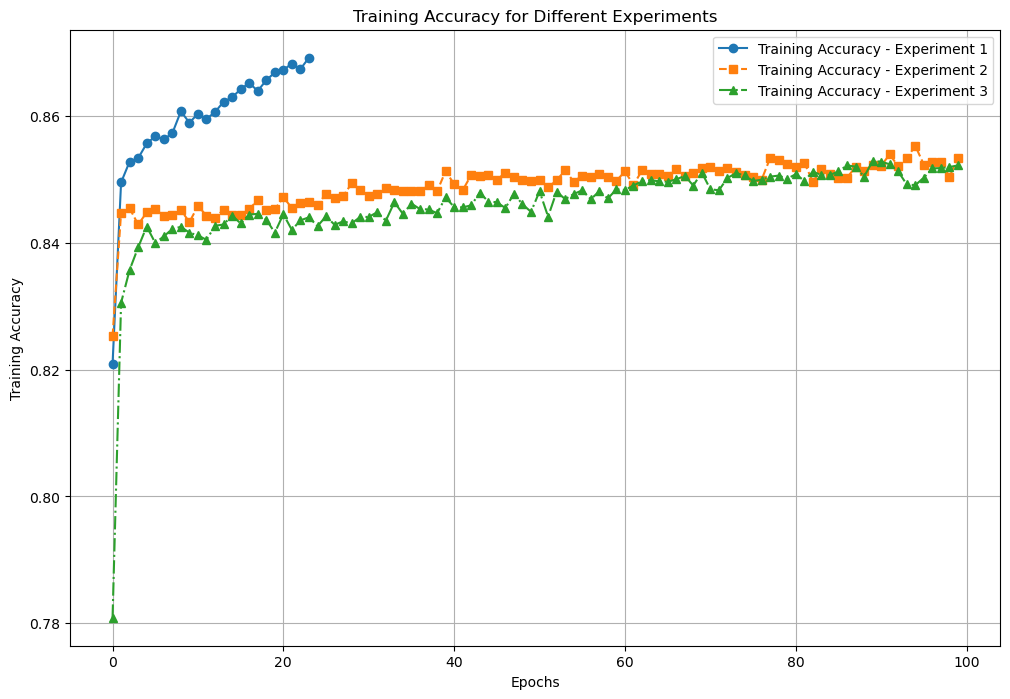

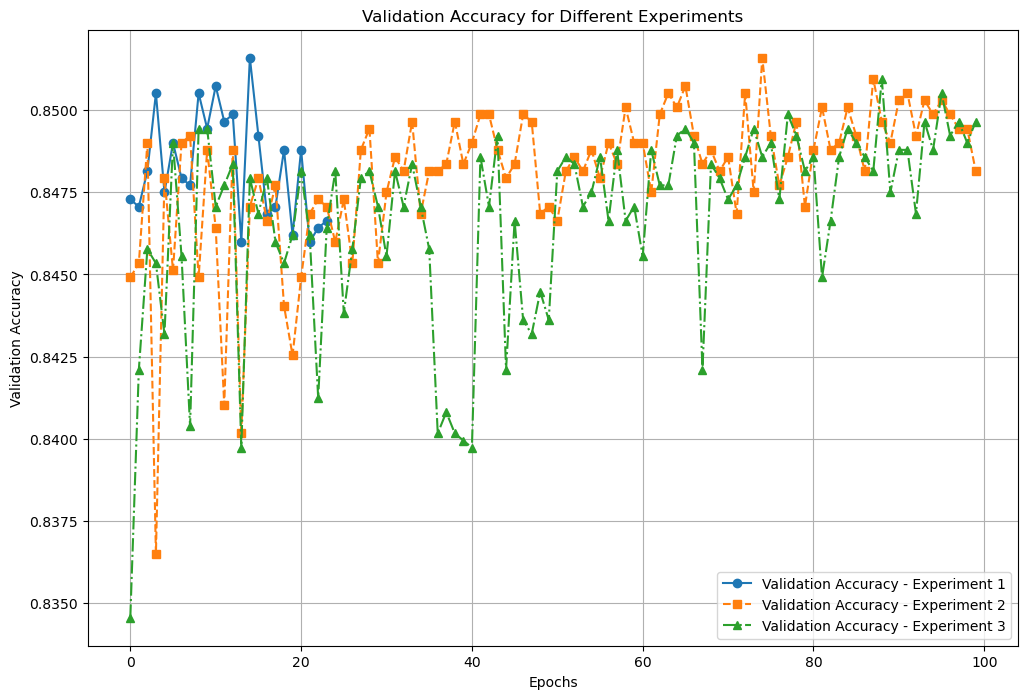

    參數組合  BEST VAL ACCURACY  BEST VAL LOSS
0  第1組參數           0.851596       0.308446
1  第2組參數           0.851596       0.308655
2  第3組參數           0.850949       0.309084


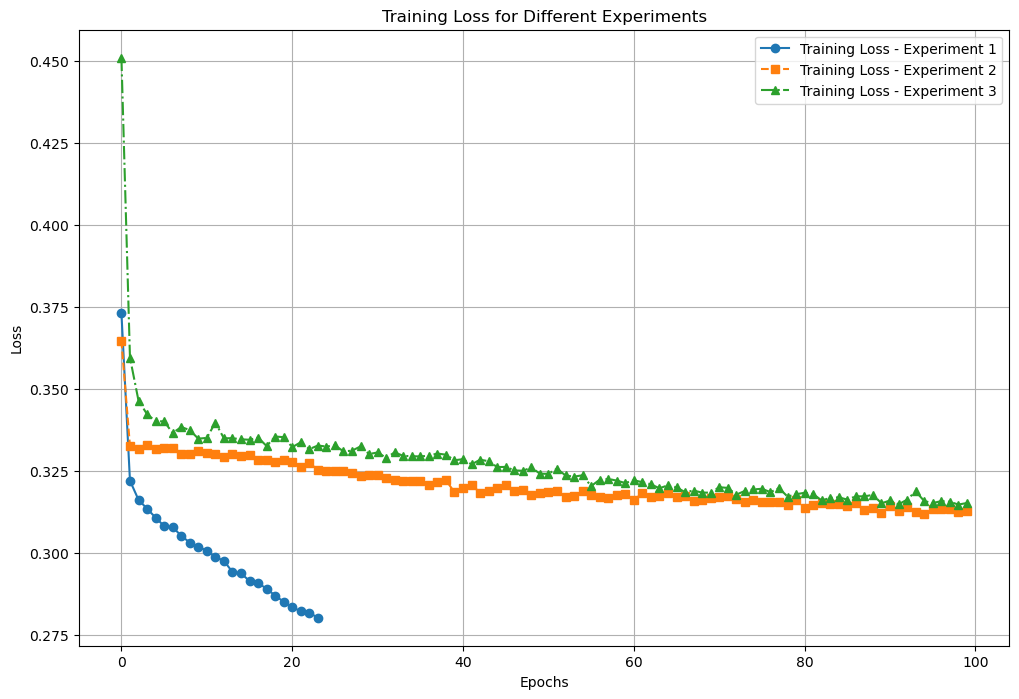

<Figure size 640x480 with 0 Axes>

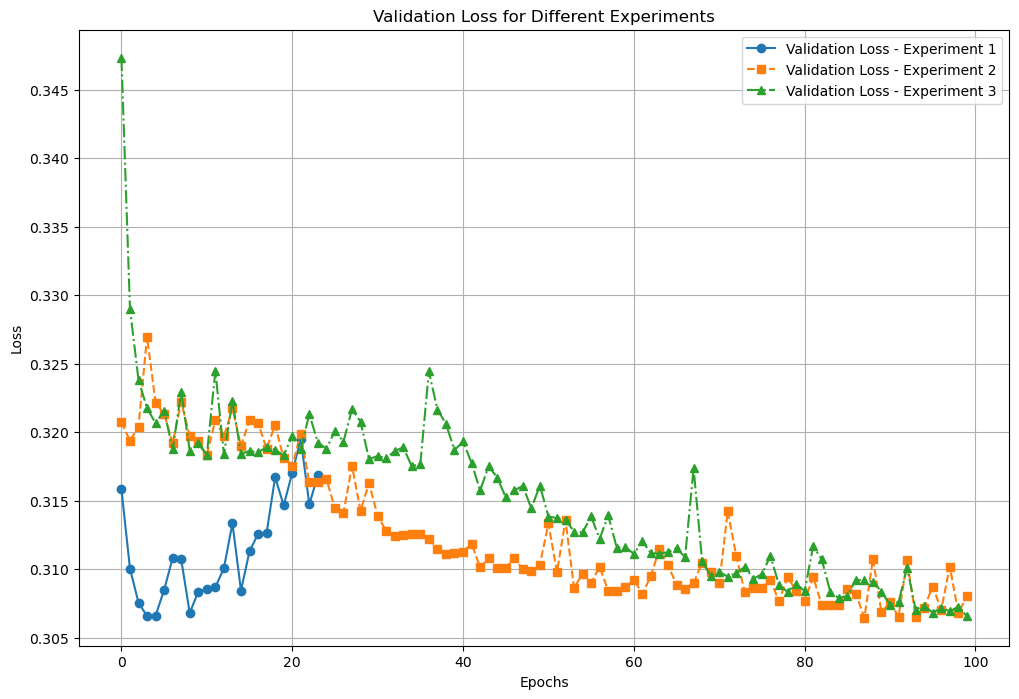

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(12, 8))
results_acc = []
results_loss = []

linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x']

for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_accuracy = history_df['accuracy'].max()
    plt.plot(history_df['accuracy'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Training Accuracy - Experiment {i+1}')
plt.title('Training Accuracy for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_val_accuracy = history_df['val_accuracy'].max()
    best_val_epoch = history_df['val_accuracy'].idxmax() + 1
    best_val_loss = history_df.loc[best_val_epoch - 1, 'val_loss']
    results_acc.append({'參數組合': f'第{i+1}組參數', 'BEST VAL ACCURACY': best_val_accuracy, 'BEST VAL LOSS': best_val_loss})
    # print(f"第{i+1}組參數: 在第 {best_val_epoch} EPOCH\n最好Accuracy: {best_val_accuracy}\nLOSS: {best_val_loss}")
    # plt.text(best_val_epoch, best_val_accuracy, f'Epoch {best_val_epoch}\nBest Val Acc: {best_val_accuracy:.4f}', 
    #             horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='green')
    # plt.plot(history_df['accuracy'], linestyle=linestyles[i], marker=markers[i], label=f'Training Accuracy - Experiment {i+1}')
    plt.plot(history_df['val_accuracy'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation Accuracy - Experiment {i+1}')

plt.title('Validation Accuracy for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
results_df_acc = pd.DataFrame(results_acc)
print(results_df_acc)


plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    plt.plot(history_df['loss'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Training Loss - Experiment {i+1}')
    
    # plt.subplot(2, 2, i + 1)
    # # plt.plot(history.history['loss'], label='train_loss')
    # # plt.plot(history.history['val_loss'], label='val_loss')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.title(f'Experiment {i + 1} Loss')
    # plt.legend()
plt.title('Training Loss for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_loss = history_df['val_loss'].min()
    best_loss_epoch = history_df['val_loss'].idxmin() + 1
    # print(f"第{i+1}組參數: 在第 {best_loss_epoch} EPOCH\nBEST LOSS: {best_loss}")
    results_loss.append({'參數組合': f'第{i+1}組參數', 'BEST LOSS': best_loss, 'BEST LOSS EPOCH': best_loss_epoch})
    plt.plot(history_df['val_loss'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation Loss - Experiment {i+1}')
    
    # plt.subplot(2, 2, i + 1)
    # # plt.plot(history.history['loss'], label='train_loss')
    # # plt.plot(history.history['val_loss'], label='val_loss')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.title(f'Experiment {i + 1} Loss')
    # plt.legend()
# results_df_loss = pd.DataFrame(results_loss)
# print(results_df_loss)
plt.title('Validation Loss for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()


In [ ]:
# Define parameters for experiments
experiments = [
    {'hidden_layers': 1, 'hidden_units': 1000, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 2, 'hidden_units': 1000, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 3, 'hidden_units': 1000, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001}
]

histories = []
batch = [64, 128, 256]
patient = [20, 20, 20]
for bsize, exp, patient in zip(batch, experiments, patient):
    model = create_model(exp['hidden_layers'], exp['hidden_units'], exp['activation'], exp['optimizer'], exp['learning_rate'])
    history = train_model(model, epochs=100, batch_size=bsize, early_stop = patient)
    histories.append(history)

plt.figure(figsize=(12, 8))
results_acc = []
results_loss = []

linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x']

for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_accuracy = history_df['accuracy'].max()
    plt.plot(history_df['accuracy'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Training Accuracy - Experiment {i+1}')
plt.title('Training Accuracy for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_val_accuracy = history_df['val_accuracy'].max()
    best_val_epoch = history_df['val_accuracy'].idxmax() + 1
    best_val_loss = history_df.loc[best_val_epoch - 1, 'val_loss']
    results_acc.append({'參數組合': f'第{i+1}組參數', 'BEST VAL ACCURACY': best_val_accuracy, 'BEST VAL LOSS': best_val_loss})
    # print(f"第{i+1}組參數: 在第 {best_val_epoch} EPOCH\n最好Accuracy: {best_val_accuracy}\nLOSS: {best_val_loss}")
    # plt.text(best_val_epoch, best_val_accuracy, f'Epoch {best_val_epoch}\nBest Val Acc: {best_val_accuracy:.4f}', 
    #             horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='green')
    # plt.plot(history_df['accuracy'], linestyle=linestyles[i], marker=markers[i], label=f'Training Accuracy - Experiment {i+1}')
    plt.plot(history_df['val_accuracy'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation Accuracy - Experiment {i+1}')

plt.title('Validation Accuracy for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
results_df_acc = pd.DataFrame(results_acc)
print(results_df_acc)


plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    plt.plot(history_df['loss'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Training Loss - Experiment {i+1}')
    
    # plt.subplot(2, 2, i + 1)
    # # plt.plot(history.history['loss'], label='train_loss')
    # # plt.plot(history.history['val_loss'], label='val_loss')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.title(f'Experiment {i + 1} Loss')
    # plt.legend()
plt.title('Training Loss for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_loss = history_df['val_loss'].min()
    best_loss_epoch = history_df['val_loss'].idxmin() + 1
    # print(f"第{i+1}組參數: 在第 {best_loss_epoch} EPOCH\nBEST LOSS: {best_loss}")
    results_loss.append({'參數組合': f'第{i+1}組參數', 'BEST LOSS': best_loss, 'BEST LOSS EPOCH': best_loss_epoch})
    plt.plot(history_df['val_loss'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation Loss - Experiment {i+1}')
    
    # plt.subplot(2, 2, i + 1)
    # # plt.plot(history.history['loss'], label='train_loss')
    # # plt.plot(history.history['val_loss'], label='val_loss')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.title(f'Experiment {i + 1} Loss')
    # plt.legend()
# results_df_loss = pd.DataFrame(results_loss)
# print(results_df_loss)
plt.title('Validation Loss for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()
